In [36]:
import csv

headers = ['MovieName']
headers.extend([f'F{i+1}' for i in range(10)])
headers.append('Attend')

data = [
    ["The Last Sunrise",3,5,4,4,4,1,4,5,2,3,1],
    ["Echoes of the Past",2,2,1,3,1,2,2,3,2,3,0],
    ["Falling Shadows",1,2,5,2,5,3,1,4,3,2,0],
    ["Whispering Pines",4,4,2,5,4,3,4,4,3,2,1],
    ["Dawn's Early Light",4,1,5,4,3,2,3,5,1,2,0],
    ["Beyond The Horizon",4,4,5,3,5,3,5,5,2,5,1],
    ["Racing Hearts",2,1,4,1,5,1,4,3,1,2,0],
    ["Through the Storm",1,5,1,1,2,3,4,2,1,3,0],
    ["Chasing Echoes",5,1,1,5,3,4,3,2,3,3,1],
    ["A Leap of Faith",5,2,1,3,3,1,1,1,2,4,0],
    ["New Beginnings",4,5,5,4,5,2,5,5,4,3,1],
    ["The Road Home",4,2,4,3,1,4,2,4,1,4,1],
    ["Twisted Fate",4,2,1,3,1,3,4,2,4,3,0],
    ["Beneath the Surface",5,2,5,4,5,4,3,3,4,4,1],
    ["The Long Goodbye",3,3,1,2,3,4,3,2,2,1,0],
    ["Silent Whispers",2,1,1,2,1,3,3,2,2,4,0],
    ["Against the Current",3,4,3,2,4,4,4,2,2,3,1],
    ["Remembering Tomorrow",1,1,1,5,2,2,1,2,2,4,0],
    ["Broken Promises",4,5,2,5,4,4,4,2,4,4,1],
    ["The Turning Point",2,1,5,2,2,3,2,1,2,3,0]
]

# write data to CSV file
with open('movie_ratings_with_names.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(headers)
    csvwriter.writerows(data)


In [37]:
import pandas as pd
df = pd.read_csv('movie_ratings_with_names.csv')
print(df)


               MovieName  F1  F2  F3  F4  F5  F6  F7  F8  F9  F10  Attend
0       The Last Sunrise   3   5   4   4   4   1   4   5   2    3       1
1     Echoes of the Past   2   2   1   3   1   2   2   3   2    3       0
2        Falling Shadows   1   2   5   2   5   3   1   4   3    2       0
3       Whispering Pines   4   4   2   5   4   3   4   4   3    2       1
4     Dawn's Early Light   4   1   5   4   3   2   3   5   1    2       0
5     Beyond The Horizon   4   4   5   3   5   3   5   5   2    5       1
6          Racing Hearts   2   1   4   1   5   1   4   3   1    2       0
7      Through the Storm   1   5   1   1   2   3   4   2   1    3       0
8         Chasing Echoes   5   1   1   5   3   4   3   2   3    3       1
9        A Leap of Faith   5   2   1   3   3   1   1   1   2    4       0
10        New Beginnings   4   5   5   4   5   2   5   5   4    3       1
11         The Road Home   4   2   4   3   1   4   2   4   1    4       1
12          Twisted Fate   4   2   1  

In [38]:
pip install pandas numpy sklearn tensorflow

Note: you may need to restart the kernel to use updated packages.


Epoch 1/150
2/2 [==============================] - 1s 7ms/step - loss: 2.9139 - accuracy: 0.3750
Epoch 2/150
2/2 [==============================] - 0s 8ms/step - loss: 2.6713 - accuracy: 0.3750
Epoch 3/150
2/2 [==============================] - 0s 8ms/step - loss: 2.4661 - accuracy: 0.3750
Epoch 4/150
2/2 [==============================] - 0s 10ms/step - loss: 2.2341 - accuracy: 0.3750
Epoch 5/150
2/2 [==============================] - 0s 12ms/step - loss: 2.0271 - accuracy: 0.3750
Epoch 6/150
2/2 [==============================] - 0s 9ms/step - loss: 1.8624 - accuracy: 0.3750
Epoch 7/150
2/2 [==============================] - 0s 15ms/step - loss: 1.6454 - accuracy: 0.3750
Epoch 8/150
2/2 [==============================] - 0s 9ms/step - loss: 1.4614 - accuracy: 0.3750
Epoch 9/150
2/2 [==============================] - 0s 12ms/step - loss: 1.2999 - accuracy: 0.3750
Epoch 10/150
2/2 [==============================] - 0s 12ms/step - loss: 1.1366 - accuracy: 0.3750
Epoch 11/150
2/2 [======

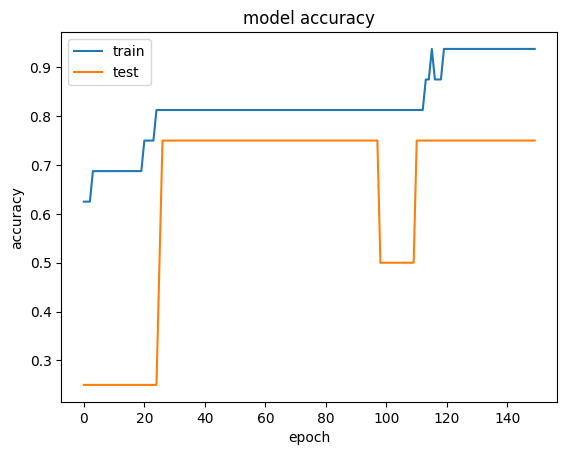

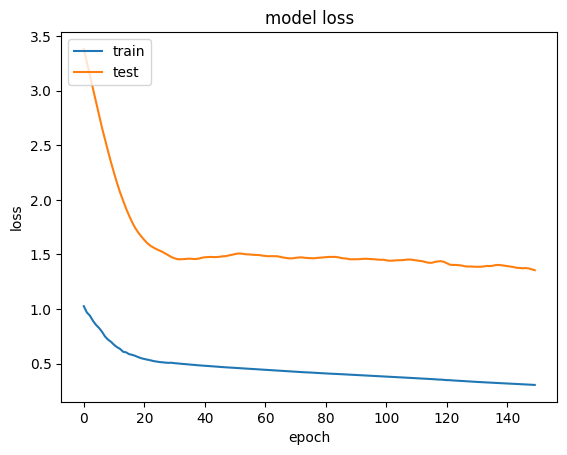

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# load dataset
df = pd.read_csv('movie_ratings_with_names.csv')

# encode movie names
le = LabelEncoder()
df['MovieName'] = le.fit_transform(df['MovieName'])

# split dataset into inputs and targets
X = df.drop('Attend', axis=1).values
y = df['Attend'].values

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# define keras model
model = Sequential()
model.add(Dense(32, input_dim=11, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

# plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
